# Beam Propagation Method: XZ 

For Rayleigh-Sommerfeld approach, masks are considered using Thin Element Approximation (TEA), that is, they are infinitely thin. This can be useful in many situations, but does not allow determining the field inside elements.

With Beam Propagation Method, we define an XZ plane with a background index (n=1 for vaccum, for example) and insert optical elements considering its shape and refraction index. We also need to include the input scalar field and propagate. Since the field is computed sequentially, no multiprocessing is possible for determining the u(x,z) field in monocromatic, single field. 

One disventage of this technique is that no reflections are considered, although perhaps they can be included in the future.

## Nanojet
In this first case, we insert an sphere of index $n=1.5$ and propagates.

In [1]:
from diffractio import degrees, mm, plt, sp, um, np

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

number of processors: 8


In [2]:
%matplotlib inline  

from matplotlib import rcParams
rcParams['figure.figsize']=(7,8)
rcParams['figure.dpi']=200

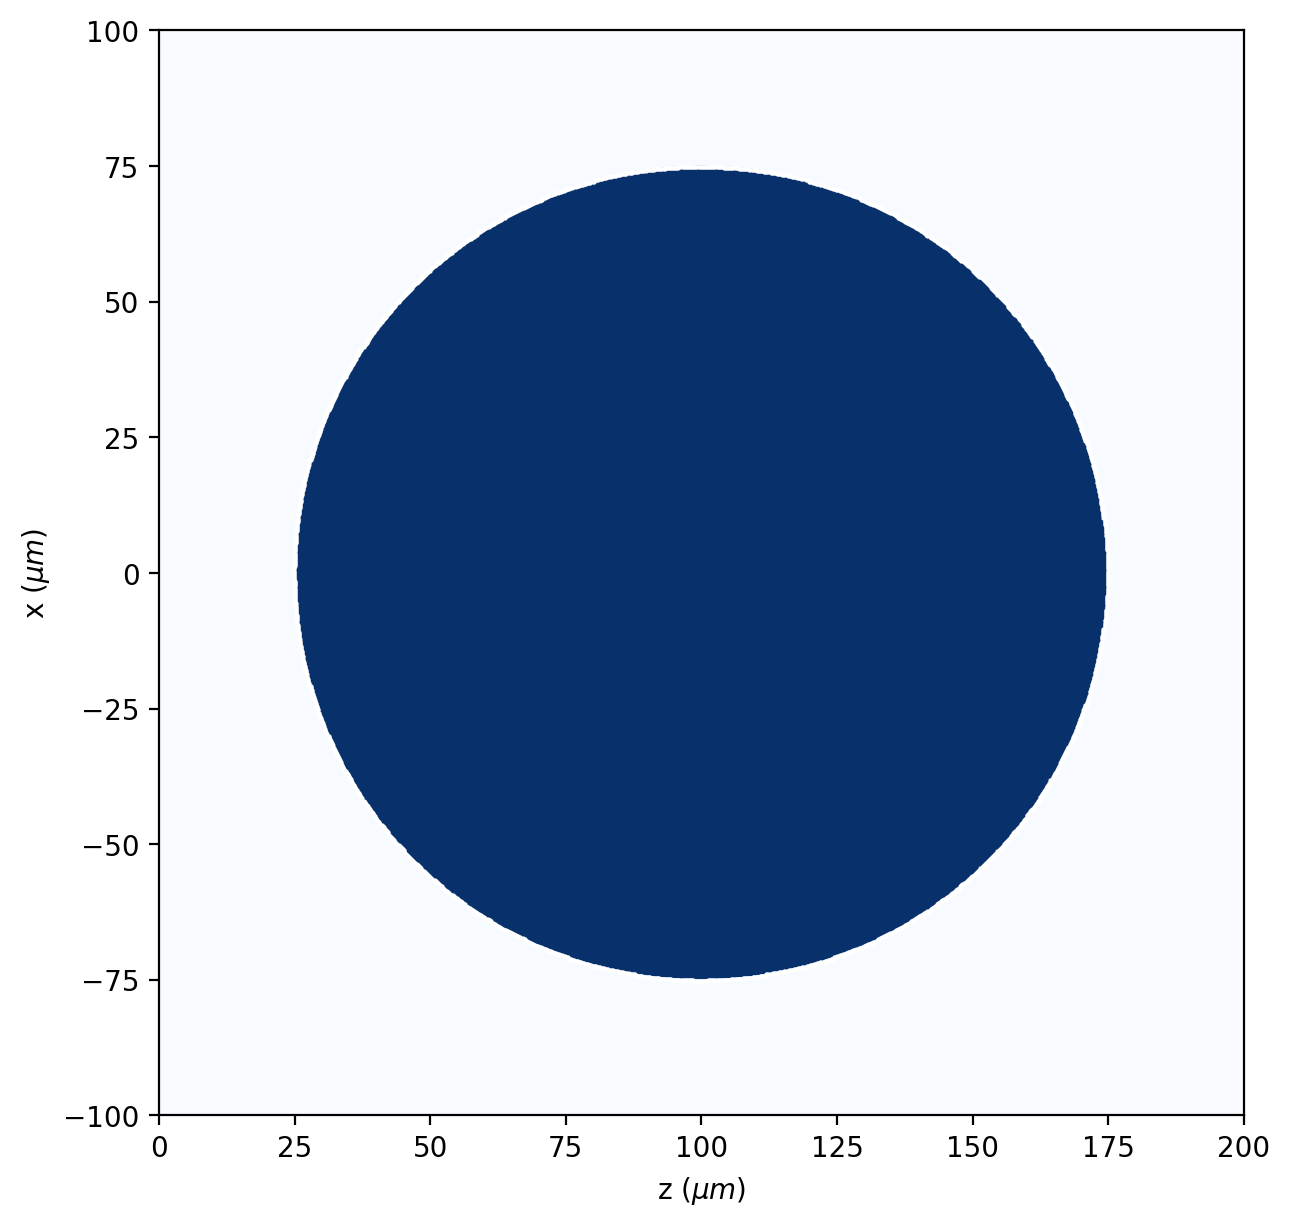

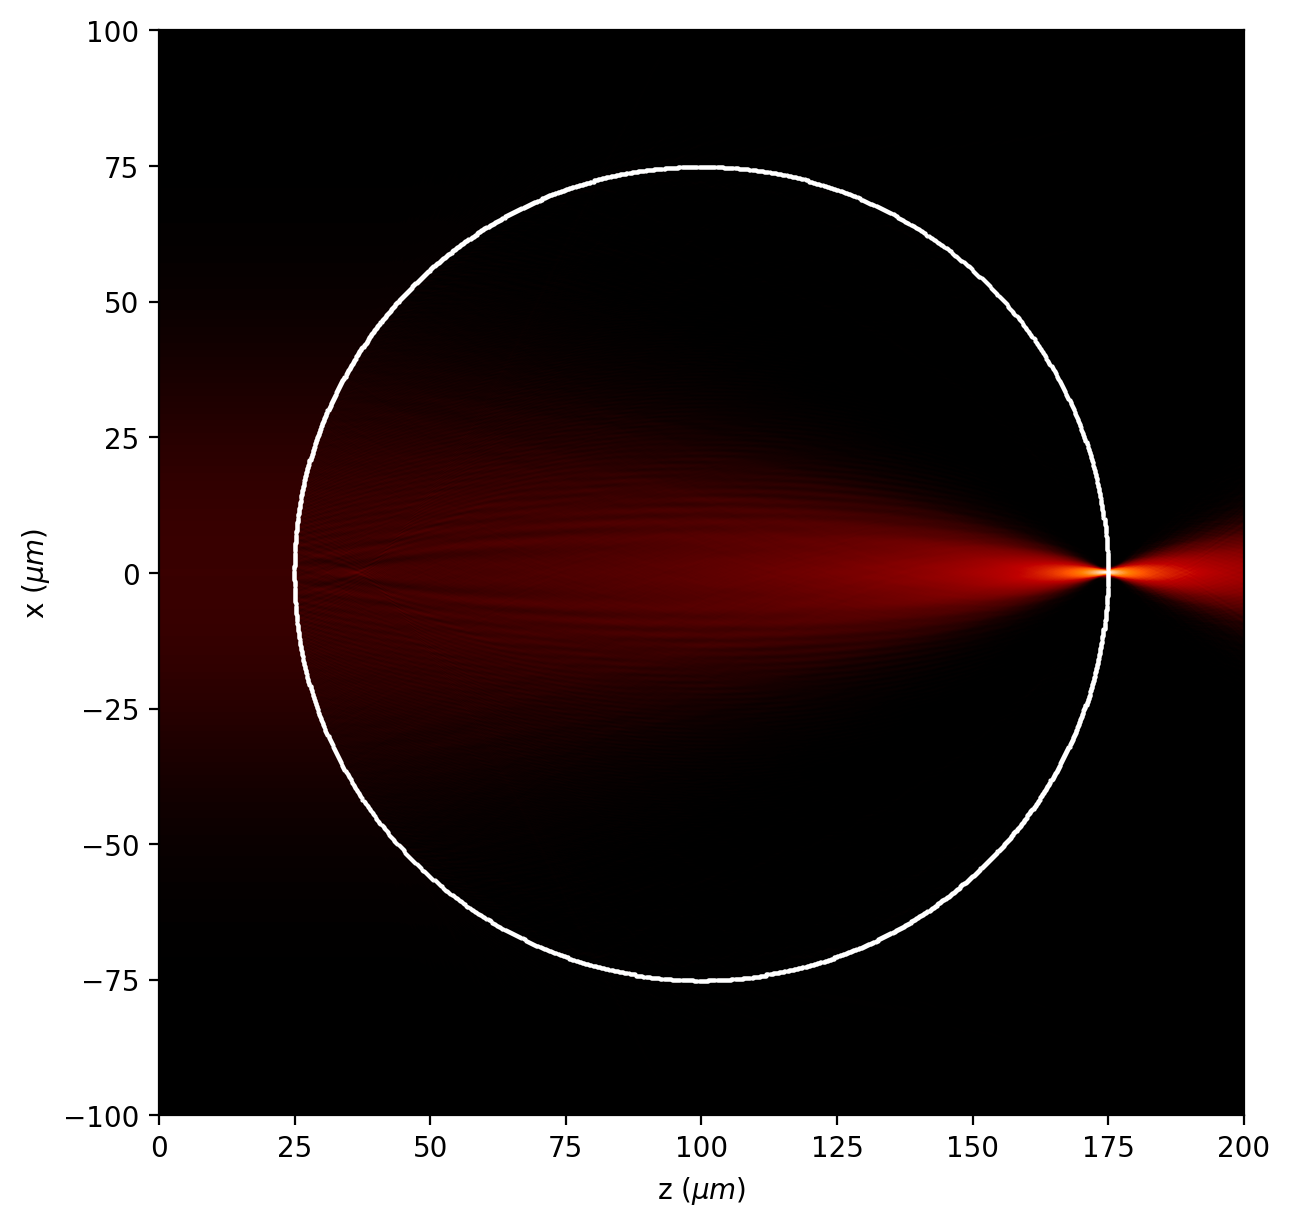

In [3]:
# Initial parameters
x0 = np.linspace(-100 * um, 100 * um, 2048)
z0 = np.linspace(0 * um, 200 * um, 2048)
wavelength = 0.6238 * um

radius_sphere = 75 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=50 * um, theta=0. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)  # insert field

# insert sphere
u1.sphere(
    r0=(0, 100 * um),
    radius=(radius_sphere, radius_sphere),
    refraction_index=1.5)

# draw refraction index
u1.draw_refraction_index(scale='scaled')

# BPM propagation 
u1.BPM(verbose=False)

# draw results
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.show()

## Ronchi grating at focal distance of a lens

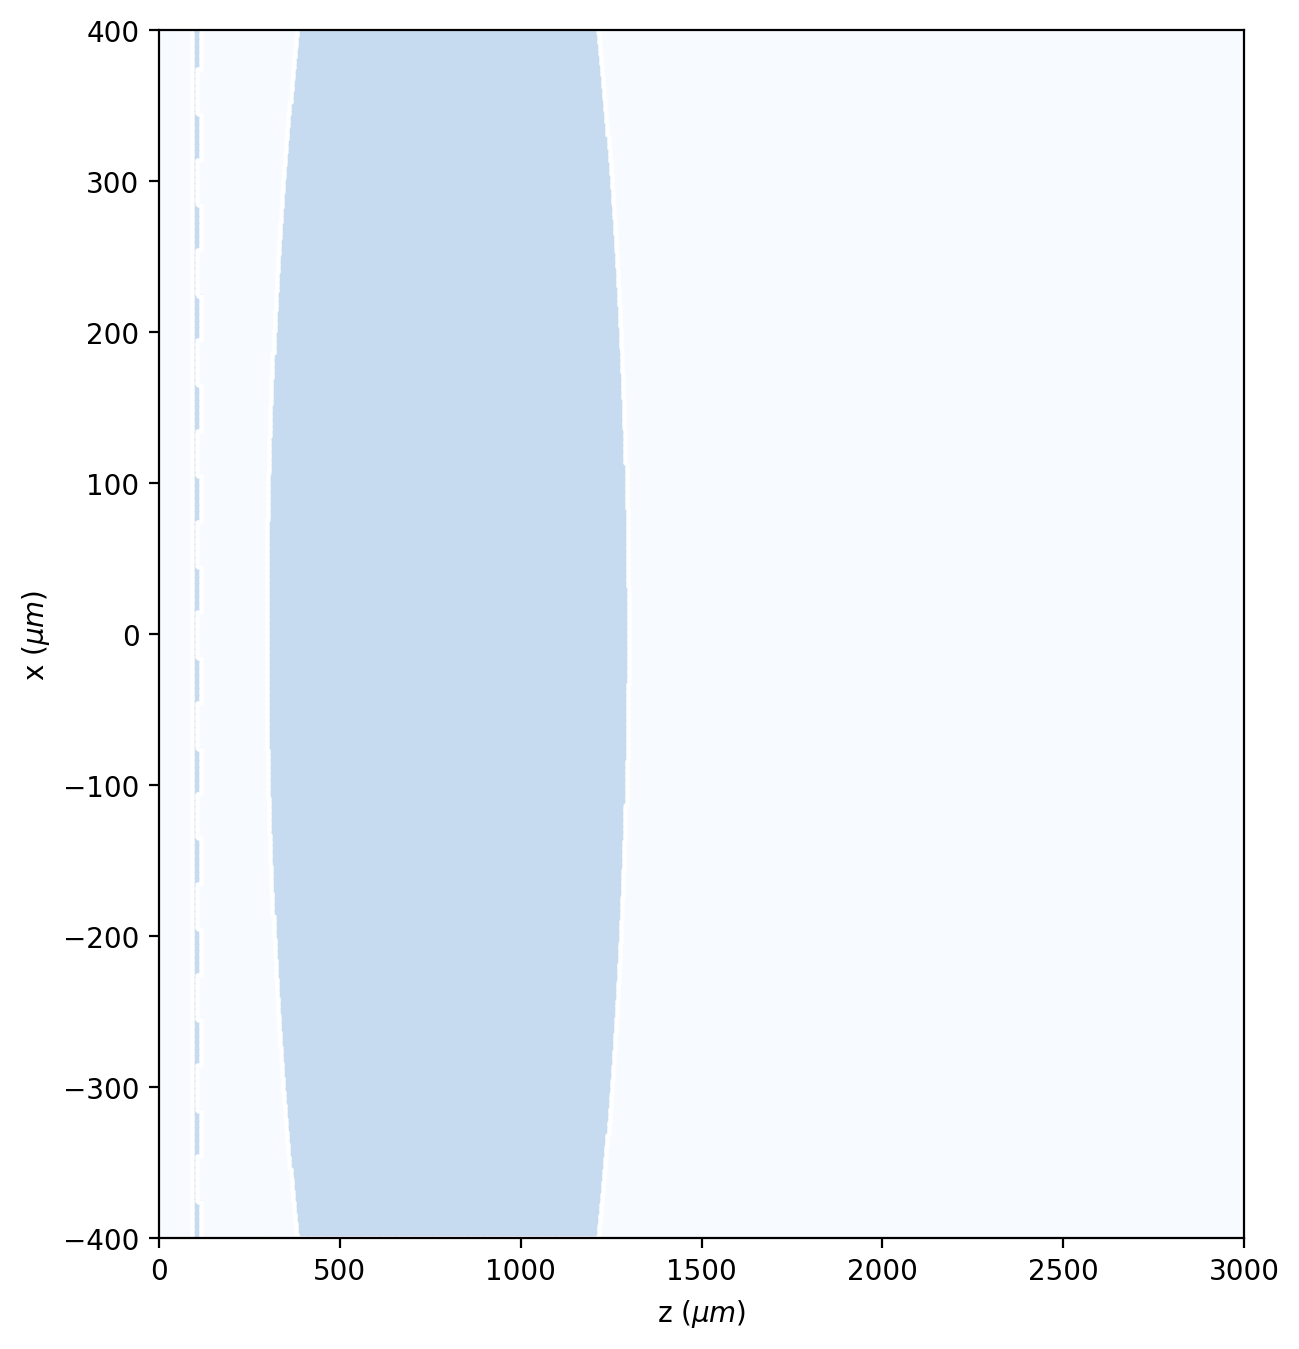

In [30]:
x0 = np.linspace(-400 * um, 400 * um, 2048*2)
z0 = np.linspace(0 * um, 3*mm * um, 2048)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

focal,_=u1.lens_convergent(
    r0=(0 * um, 299 * um),
    aperture=800 * um,
    radius=(1 * mm, -1 * mm),
    thickness=1000 * um,
    refraction_index=1.5,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))

refraction_index=1.5
height_grating = 10*(refraction_index - 1) * wavelength /2
u1.ronchi_grating(
    period=60 * um,
    fill_factor=0.5,
    length=2* mm,
    height=height_grating,
    r0=(0 * um, 100 * um),
    Dx=0 * um,
    refraction_index=refraction_index,
    heigth_substrate=height_grating,
    refraction_index_substrate=refraction_index,
    angle=0 * degrees)

u1.draw_refraction_index()

edge_matrix=u1.borders

u1.filter_refraction_index(pixels_filtering=2,type_filter=2);



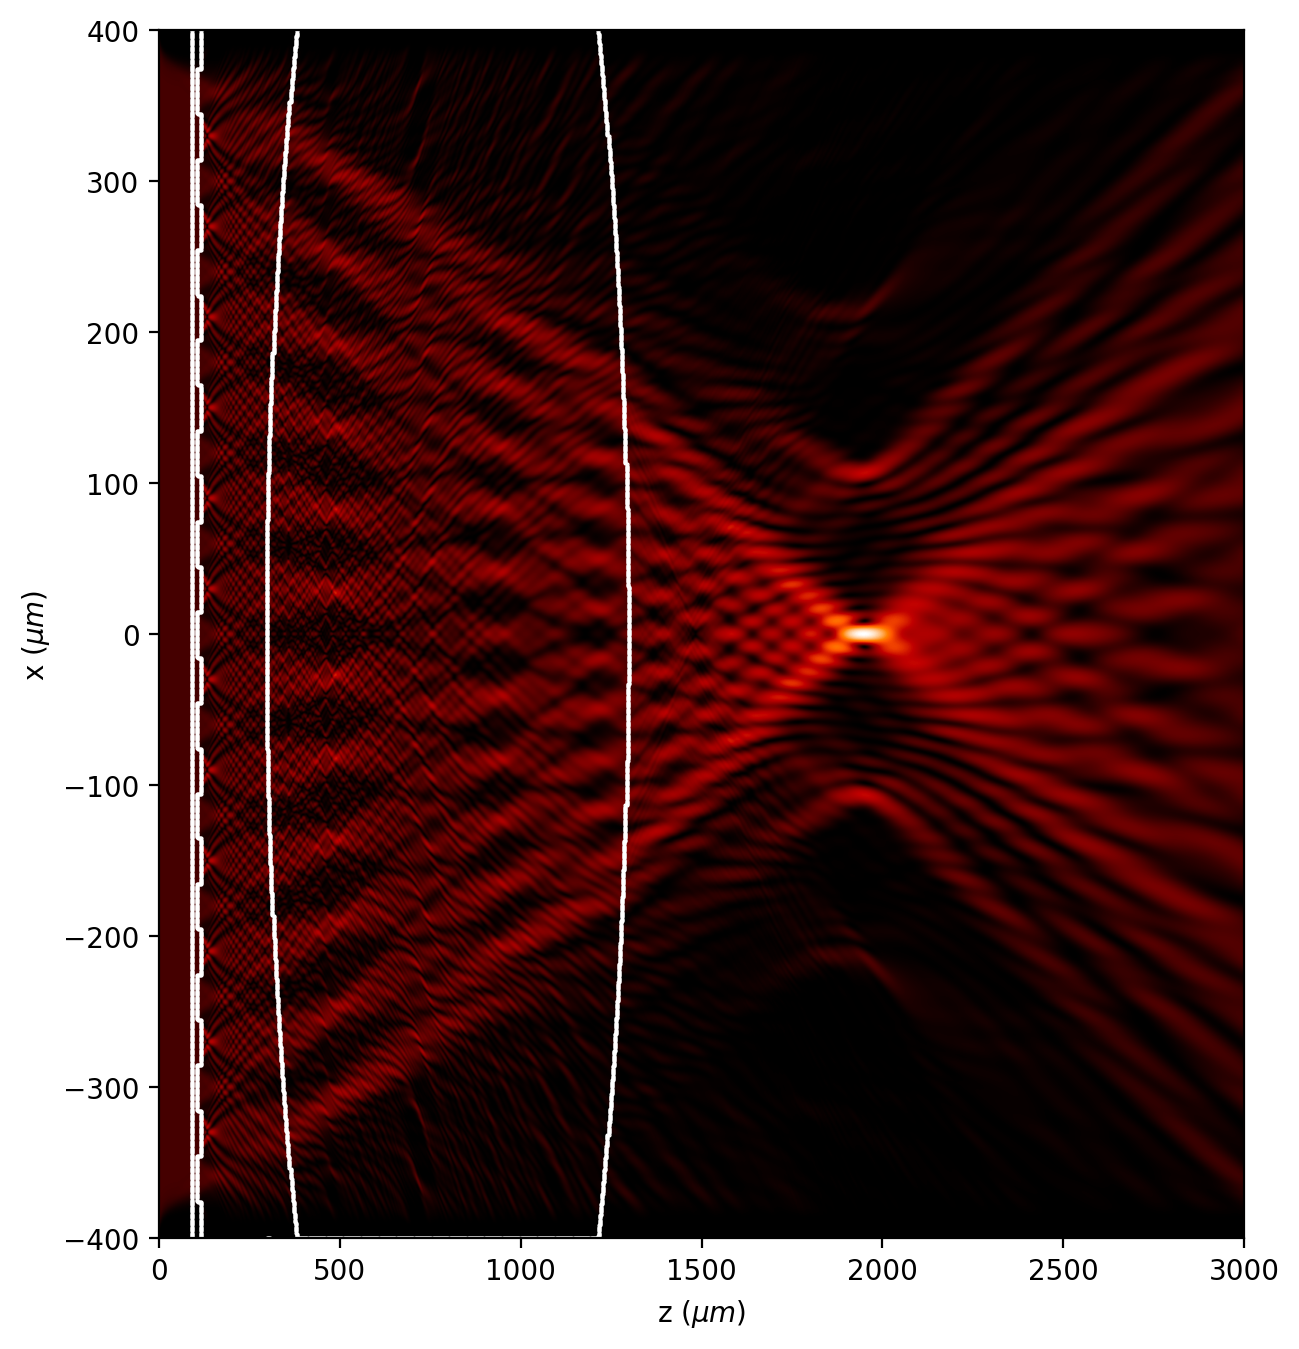

In [31]:
u1.BPM(verbose=False)
u1.draw(kind='intensity', logarithm=True, draw_borders=True);

In [32]:
x_f,z_f=u1.search_focus()

x = 0.098 um, z = 1947.728 um


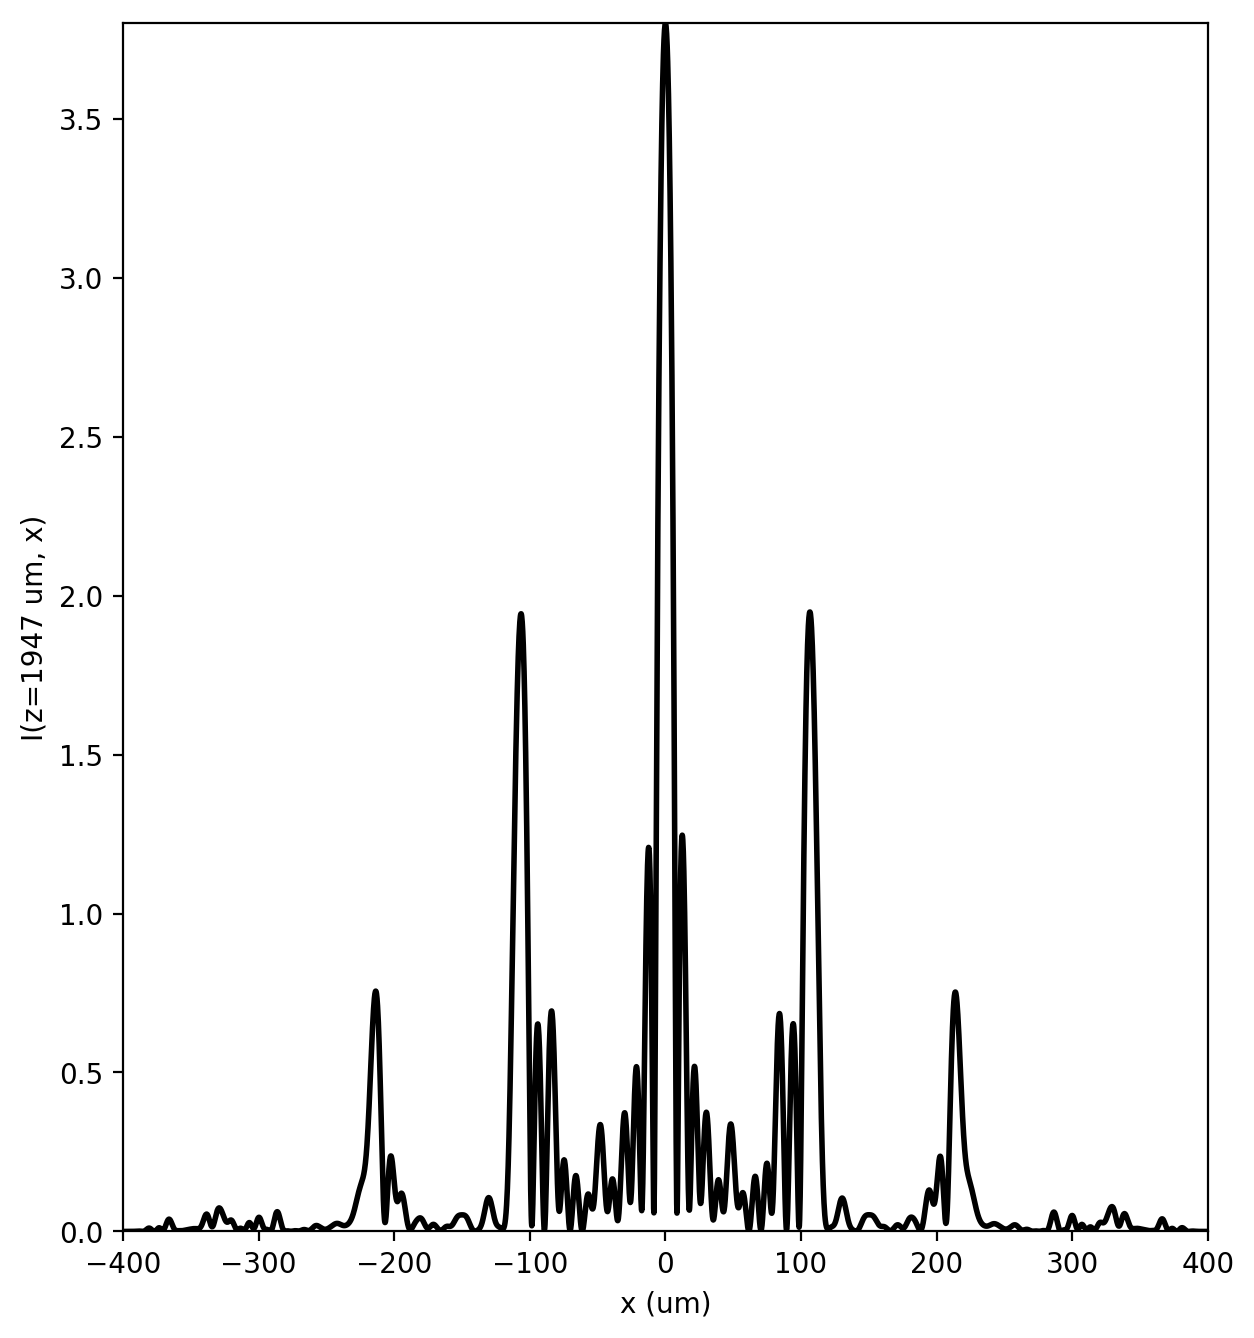

In [33]:
u1.profile_transversal(z0=z_f,logarithm=True);